<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER5%20%EB%AA%A8%EB%8D%B8%20%ED%8F%89%EA%B0%80%EC%99%80%20%EC%84%B1%EB%8A%A5%20%ED%96%A5%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **들어가며**

지도 학습 모델을 평가하고자 `train_test_split` 함수를 사용해서 두 세트로 나눴습니다. 그리고 모델을 만들기 위해 훈련 세트에 `fit` 메서드를 적용했습니다. 모델을 평가하기 위해 테스트 세트에 `score` 메서드를 사용했습니다. 분류 문제의 경우에 `score` 메서드는 정확하게 분류된 샘플의 비율을 계산합니다.

In [3]:
pip install mglearn

     |████████████████████████████████| 540 kB 4.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=36039a7d7c5c2474d5e4d60735acbcef01a346d5881f797a796776c7fea4ea83
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [4]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

In [5]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print('테스트 세트 점수: {:.2f}'.format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


익숙한 코드 형식입니다. 새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정할 목적으로 데이터를 훈련 세트와 테스트 세트로 나눕니다. 모델이 훈련 세트에 잘 맞는 것보다 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘 하느냐가 중요합니다. 무엇보다도 과대적합과 과소적합을 방지하면서 균형점을 지진 최적의 모델을 형성해야 합니다.

이번 챕터에서는 두 가지 관점에서 이 평가 방법을 확장합니다. 먼저 안정적인 일반화 성능 측정 방법인 **교차 검증**에 대해 설명합니다. `score` 메서도가 제공하는 정확도와 $R^2$ 값 이외에 분류와 회귀 성능을 측정하는 다른 방법도 설명합니다. 아울러 최적의 일반화 성능을 얻을 목적으로 매개변수를 조정하는 데 유용한 **그리드 서치**에 대해서도 설명합니다.

# 5.1 **교차 검증**

**교차 검증(cross-validation)**은 훈련 세트와 테스트 세트로 한 번 나눈 것보다 더 안정적이고 뛰어난 통계적 방법입니다. 교차 검증에서는 데이터를 여러 번 반복해서 나누고 여러 모델을 학습합니다. 

많이 사용되는 방법 중에 하나는 **k-겹 교차 검증(k-fold cross-validation)**입니다. k는 특정 숫자이며, 일반적으로 5나 10입니다. 5-겹 교차 검증을 하려면 데이터를 먼저 **폴드(fold)**라고 하는 거의 비슷한 크기의 부분 집합 다섯 개로 나눕니다. 그리고나서 일련의 모델을 생성합니다.

첫 번째 모델은 첫 번째 폴드를 테스트 세트로 사용하고, 나머지 폴드를 훈련 세트로 사용해서 학습합니다. 즉 폴드 2~5까지의 데이터로 모델을 만들고, 폴드 1을 사용해서 정확도를 평가합니다. 

두 번째 모델은 두 번째 폴드를 테스트 세트로 사용하고, 나머지 폴드를 훈련 세트로 사용해서 학습합니다. 즉 폴드 1과 3~5까지의 데이터로 모델을 만들고, 폴드 2를 사용해서 정확도를 평가합니다.

이 방식으로 5까지 반복합니다. 분할을 다섯 번만큼 시도하면서 정확도를 측정하면 정확도 다섯 개를 얻습니다.

위 설명을 그림으로 나타냅니다.

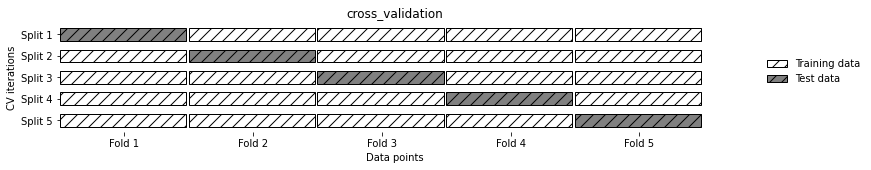

In [6]:
mglearn.plots.plot_cross_validation()

## 5.1.1 **scikit-learn의 교차 검증**

교차 검증은 `model_selection` 모듈의 `cross_val_score` 함수로 구현되어 있습니다. `cross_val_score` 함수가 가진 매개변수는 평가하려는 모델과 훈련 데이터, 타깃 레이블입니다.

iris 데이터셋에 적용한 `LogisticRegression`을 평가합니다.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris.data, iris.target)
print('5-겹 교차 검증 점수:', scores)

5-겹 교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


5-겹(기본값) 교차 검증을 수행했으므로 점수 5개가 반환됐습니다.

폴드 수는 `cv` 매개변수로 지정할 수 있습니다. 10-겹 교차 검증을 수행합니다.

In [8]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print('10-겹 교차 검증 점수:', scores)

10-겹 교차 검증 점수: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


최소한 5-겹 교차 검증 정도를 사용하는 편이 좋습니다. 일반적으로 교차 검증의 정확도를 간단하게 나타내려면 평균을 이용합니다.

In [9]:
print('10- 겹 교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

10- 겹 교차 검증 평균 점수: 0.97


모델 정확도를 97%로 판단할 수 있습니다. 10-겹 교차 검증이 만든 값 열 개를 보면 93~100%까지 각각 다른 값을 가집니다. 이는 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문입니다. 

교차 검증에 `cross_validate` 함수도 사용할 수 있습니다. 이 함수는 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환합니다. 훈련 점수와 테스트 점수 모두 반환하도록 매개변수를 지정할 수도 있습니다. 기실 `cross_validate_score` 함수는 `cross_validate` 함수를 사용해서 `test_score` 키만 반환하는 것입니다.

In [10]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.03245711, 0.03103471, 0.02249646, 0.02913761, 0.02303267]),
 'score_time': array([0.00041008, 0.00045776, 0.00039768, 0.00041103, 0.00040317]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

판다스를 사용해서 결괏값을 출력하고 평균을 계산합니다.

In [11]:
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수:\n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.032457,0.000410,0.966667,0.966667
1,0.031035,0.000458,1.000000,0.966667
2,0.022496,0.000398,0.933333,0.983333
3,0.029138,0.000411,0.966667,0.983333
4,0.023033,0.000403,1.000000,0.975000


평균 시간과 점수:
 fit_time       0.027632
score_time     0.000416
test_score     0.973333
train_score    0.975000
dtype: float64


### **NOTE**

교차 검증은 새로운 데이터에 적용할 모델을 만드는 방법이 아닙니다. 교차 검증 함수는 결코 모델을 반환하지 않습니다. `cross_val_score` 함수를 호출하면 내부적으로 여러 모델이 만들어질 뿐입니다. 교차 검증의 목적은 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 가늠하는 것입니다.

교차 검증으로 모델을 만들 수는 없지만 `cross_val_predict` 함수를 사용해서 예측값을 구할 수 있습니다. `cross_val_predict(logreg, iris.data, iris.target, cv=5)` 형식을 취하면 각 폴드가 테스트 세트일 때 예측된 값을 반환합니다.

## **5.1.2 교차 검증의 장점과 단점**

교차 검증에는 몇 가지 장점이 있습니다.

먼저 `train_test_split` 함수로 데이터를 나눌 때, 훈련 세트에 분류하기 어려운 샘플만 담기게 되었다고 가정하겠습니다. 이 경우에 테스트 세트에는 분류하기 쉬운 샘플만 들어 있어서 테스트 세트에 대한 정확도는 비정상적으로 높게 나올 것입니다. 반대로 분류하기 어려운 샘플들이 모두 테스트 세트에 들어간다면 정확도는 매우 낮게 나올 것입니다.

그러나 교차 검증을 사용하면 테스트 세트에 각 샘플이 정확하게 한 번씩 들어갑니다. 각 샘플은 폴드 중 하나에 속하며, 각 폴드는 한 번씩 테스트 세트가 됩니다. 따라서 교차 검증의 점수와 평균값을 높이기 위해서는 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화되어야 합니다.

또 데이터를 여러 개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 확인할 수 있습니다. iris 데이터셋에서 얻은 90~100% 정확도 범위는 꽤 넓으며, 새로운 데이터를 적용했을 때 최악의 경우와 최선의 경우를 짐작할 수 있습니다.

아울러 교차 검증은 분할을 한 번 했을 경우보다 데이터를 효과적으로 사용할 수 있다는 것입니다. `train_test_split` 함수를 사용하면 일반적으로 데이터 중에 75%를 학습에 사용하고, 25%를 평가에 사용합니다. 예컨대 5-겹 교차 검증의 경우는 매 반복에서 4/5(80%)의 데이터를 학습에 사용합니다. 10겹 교차 검증의 경우는 매 반복에서 9/10(90%)의 데이터를 학습에 사용합니다. 많은 데이터는 더 좋은 모델을 만듭니다.

다만 교차 검증에는 단점이 한 가지 존재합니다.

모델을 k개만큼 생성하므로 연산 비용이 크게 늘어납니다. k배만큼 느려진다고 볼 수 있습니다.

## **5.1.3 계층별 k-겹 교차 검증과 그외 전략들**

데이터셋을 나열 순서대로 k개의 폴드로 나누는 것은 항상 좋지만은 않습니다. iris 데이터셋으로 예를 듭니다.

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
print('Iris 레이블:\n', iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


첫 번째부터 1/3까지는 클래스 0입니다. 각 1/3씩 클래스 1, 클래스 2로 나뉘어 있습니다.

이 데이터에 3-겹 교차 검증을 적용한다고 가정하겠습니다. 첫 번째 폴드는 클래스 0만을 가졌으므로 첫 번째 반복에서 테스트 세트는 클래스 0만 가지고, 훈련 세트는 클래스 1과 2만 가집니다. 세 번을 반복하면 훈련 세트와 테스트 세트의 클래스가 다르므로 정확도가 0이 됩니다. 결국 이 방법은 완전히 잘못됐습니다.

따라서 일반화 성능을 측정할 때 단순한 k-겹 교차 검증이 아닌 **계층별 k-겹 교차 검증(stratidied k-fold cross validation)**을 사용하는 것이 현명합니다. 이 방법은 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눕니다. 

참고로 `cross_val_score` 함수에서 폴드를 나눌 때, 분류에는 `StratifiedKFold`를 사용해서 훈련 세트와 테스트 세트를 나누고, 회귀에는 일반적인 `KFold`를 사용합니다. `KFold`를 사용할 때 `shuffle` 매개변수에 `True` 값을 지정하면 폴드를 나누기 전에 무작위로 섞을 수 있으나, 이 매개변수를 직접 지정할 방법은 없습니다. 'KFold' 객체를 생성해서 `cross_val_score` 함수의 `cv` 매개변수를 지정하고 객체에 전달해야 합니다.

계층별 k-겹 교차 검증에 대한 설명을 그림으로 나타냅니다.

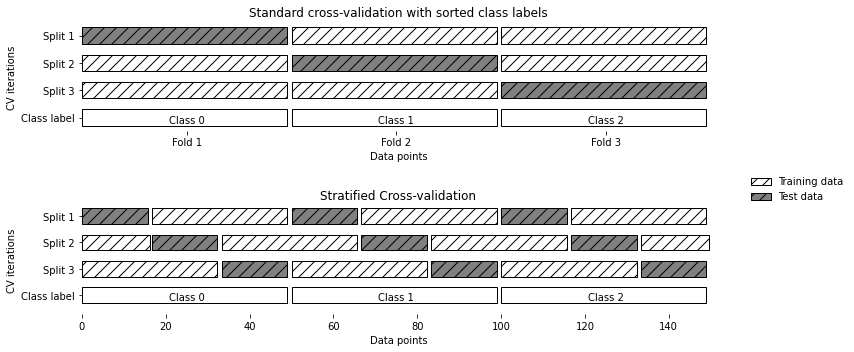

In [13]:
mglearn.plots.plot_stratified_cross_validation()

예를 들어 샘플의 90%가 클래스 A, 10%가 클래스 B라면 계층별 교차 검증은 각 폴드에 클래스 A에 속하는 샘플이 90%, 클래스 B에 속하는 샘플이 10%가 되도록 배치합니다.

### **교차 검증 상세 옵션**

위에서 `cross_val_score` 함수에 `cv` 매개변수로 값을 전달해서 폴드 개수를 지정했습니다. 이 방법 말고 더 세밀하게 데이터를 분할하는 방법을 사용할 수 있습니다. `cv` 매개변수에 **교차 검증 분할기(cross-validation splitter)**를 전달하는 것입니다.

분류에서는 계층별 k-겹 교차 검증, 회귀에서는 기본 k-겹 교차 검증의 기본값이 잘 작동합니다. 하지만 다른 전략이 필요한 경우가 있습니다. 예컨대 다른 사람의 결과를 재현하기 위해 분류 데이터셋에 기본 k-겹 교차 검증을 사용해야 할 경우입니다. 이 경우에는 `KFold` 분할기를 임포트 해서 원하는 폴드 수를 넣고 객체를 생성해야 합니다.

In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

'kfold' 객체를 `cv` 매개변수에 값으로 지정합니다.

In [15]:
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [1.         1.         0.86666667 0.93333333 0.83333333]


iris 데이터셋에 기본 3-겹 교차 검증을 사용하여 방법에 대한 타당성을 확인합니다.

In [16]:
kfold = KFold(n_splits=3)
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습할 수 없습니다. 계층별 폴드를 만드는 대신 이 문제를 해결하는 다른 방법은 데이터를 섞어서 샘플 순서를 뒤죽박죽으로 만드는 것입니다. 데이터를 분할하기 전에 섞어주면 결과가 더 좋습니다.

데이터를 섞기 위해 `KFold` 클래스의 `shuffle` 매개변수를 `True`로 지정합니다. 아울러 `random_state` 매개변수에 지정할 값을 고정하여 폴드가 매번 바뀌는 것을 방지해야 합니다.

In [17]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


### **LOOCV**

**LOOCV(Leave-one-out cross-validation)**도 자주 사용하는 교차 검증 방법입니다. 이는 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증입니다. 각 반복에서 샘플 하나를 선택해서 테스트 세트로 사용합니다. 데이터셋이 클 경우에는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 더 좋은 결과를 도출하기도 합니다.

In [18]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 분할 횟수:', len(scores))
print('평균 정확도: {:.2f}'.format(scores.mean()))

교차 검증 분할 횟수: 150
평균 정확도: 0.97


### **임의 분할 교차 검증**

**임의 분할 교차 검증(shuffle-split cross-validation)**은 매우 유연한 교차 검증 방법입니다. 매개변수인 `train_size`에 지정한 값만큼 훈련 세트를 만들고, 또 다른 매개변수인 `test_size`에 지정한 값만큼 훈련 세트와 중첩되지 않은 샘플로 테스트 세트를 만들도록 분할합니다. `n_splits` 매개변수에 반복 횟수를 지정합니다.

샘플이 10개인 데이터셋을 샘플 5개로 이루어진 훈련 세트, 샘플 2개로 이루어진 테스트 세트로 4번만큼 반복하는 임의 분할 교차 검증을 시각화합니다. 참고로 `train_size`와 `test_size`에 정수를 입력하면 샘플의 절대 개수, 실수를 입력하면 전체 데이터의 비율이 지정됩니다.

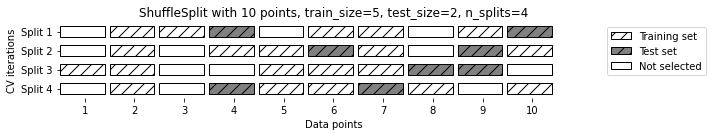

In [19]:
mglearn.plots.plot_shuffle_split()

데이터셋의 50%씩 훈련 세트와 테스트 세트로 10번만큼 반복 분할합니다.

In [20]:
from sklearn.model_selection import ShuffleSplit
# `random_state` 매개변수에 값을 지정하지 않으면 셀을 실행할 때마다
# 매번 다른 결과가 출력됩니다. 샘플 하나가 매번 다른 세트에 포함되는 것입니다.
shuffle_split = ShuffleSplit(train_size=.5, test_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수:\n', scores)

교차 검증 점수:
 [0.93333333 0.98666667 0.94666667 0.97333333 1.         0.97333333
 0.96       0.96       0.94666667 0.93333333]


임의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 경우에 유용하게 사용됩니다. `train_size`와 `test_size`의 합을 전체와 다르게 해서 전체 데이터의 일부만 사용할 수도 있습니다. 이런 방식으로 데이터를 **부분 샘플링(subsampling)**하는 방식은 대규모 데이터셋으로 작업할 때 도움이 됩니다. 추가로 `StratifiedShuffleSplit` 클래스는 `ShuffleSplit` 클래스의 계층별 버전이며, 분류 작업에 적합합니다.

### **그룹별 교차 검증**

데이터에 연관성을 가진 그룹이 있을 경우에도 교차 검증을 많이 사용합니다.

얼굴 사진에서 표정을 인식하는 시스템을 생성하고자 사람 100명을 나타낸 사진을 모았다고 가정하겠습니다. 한 사람을 나타낸 사진은 여러 장이고 사진마다 다른 표정을 담고 있습니다. 문제의 목표는 이 데이터셋에 들어있지 않은 사람이 짓는 표정을 정확하게 구분하는 분류기를 생성하는 것입니다.

이 분류기가 내는 성능을 측정하기 위해 계층별 교차 검증을 시도할 수 있습니다. 그러나 같은 사람의 사진이 훈련 세트와 테스트 세트 모두에 나타날 수 있습니다. 완전히 새로운 얼굴보다 훈련 세트에 있던 얼굴의 표정은 훨씬 쉽게 식별할 것입니다. 새 얼굴에 대한 일반화 성능을 더 정확하게 평가하려면 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야 합니다.

이를 도모하려면 사진 속의 사람이 누구인지 기록한 배열을 `groups` 매개변수로 전달받을 수 있는 `GroupKFold` 매개변수를 사용할 수 있습니다. 'groups' 객체(배열)는 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것입니다. 클래스 레이블과 혼동하지 않아야 합니다.

데이터에 그룹이 있는 예로는 의료 애플리케이션을 들 수 있습니다. 목적은 같은 환자 데이터에서 얻은 여러 샘플을 가지고 새로운 환자에게 일반화하는 것입니다.

음성 인식의 경우에도 데이터셋에 같은 사람의 목소리가 여러 개 녹음되어 있을 수 있으며, 문제의 목적은 새로운 사람의 대화를 인식하는 것입니다.

인위적으로 생성한 데이터셋에 'groups' 배열로 그룹을 지정합니다. 샘플 12개로 구성되었고, 'groups'는 각 샘플에 대해 각 샘플이 어떤 그룹에 속하는지 나타냅니다. 그룹 4개를 나타내며, 처음 샘플 3개는 첫 번째 그룹, 다음 샘플 4개는 두 번째 그룹을 나타내는 식입니다.

In [21]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
# 처음 샘플 3개는 같은 그룹에 속하고
# 다음 샘플 4개는 같은 그룹에 속하는 식입니다.
# 값은 정렬하지 않아도 괜찮습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수:\n', scores)

교차 검증 점수:
 [0.75       0.6        0.66666667]


분할을 그룹 레이블을 기반으로 계산합니다.

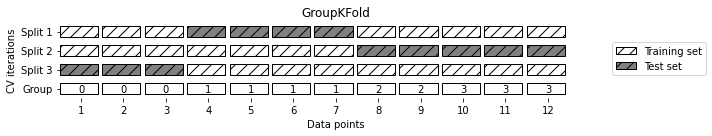

In [22]:
mglearn.plots.plot_group_kfold()

각 분할에서 한 그룹 전체가 훈련 세트 또는 테스트 세트에 위치합니다.

위에서 설명한 `KFold`, `StratifiedKFold`, `GroupKFold` 교차 검증 방법을 많이 사용합니다. 다른 교차 검증 전략에 대한 추가 정보는 [링크](https://scikit-learn.org/stable/modules/cross_validation.html)를 참고하시기 바랍니다.

## **5.1.4 반복 교차 검증**

데이터셋 크기가 크지 않을 경우에는 안정된 검증 점수를 얻고자 교차 검증을 반복하면서 수행하는 경우가 많습니다. 교차 검증을 반복해서 수행하려면 회귀의 경우에는 `RepeatedKFold` 분할기, 분류의 경우에는 `RepeatedStratifiedKFold` 분할기를 사용할 수 있습니다. 위에서 서술했던 바처럼 이 분할기를 객체로 전달하고, 그 객체를 `cross_val_score` 함수나 `cross_validate` 함수의 `cv` 매개변수에 값으로 지정하면 됩니다. `n_splits` 매개변수에 분할할 폴드 수를 지정할 수 있으며 기본값은 `5`입니다. `n_repeats` 매개변수에 반복 횟수를 지정할 수 있으며 기본값은 `10`입니다. 반복할 때마다 데이터를 다시 섞습니다.

iris 데이터셋에 반복 교차 검증을 적용합니다.

In [23]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

`RepeatedStratifiedKFold`의 객체를 생성합니다. 전체 검증 점수는 `n_splits` $\times$ `n_repeats` 만큼 만들어집니다. 기본값을 사용했으므로 $5\times10=50$개의 모델을 훈련하여 평가한 점수가 반환됩니다.

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
print('교차 검증 점수:\n', scores)
print('교차 검증 점수 평균: {:.3f}'.format(scores.mean()))

교차 검증 점수:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 점수 평균: 0.965


반복 교차 검증을 위한 이 두 분할기는 다음 절에서 제시하는 `GridSearchCV`의 `cv` 매개변수에도 적용할 수 있습니다.

# **5.2 그리드 서치**

위에서는 모델의 일반화 성능을 측정하는 방법을 살폈습니다. 이번 파트부터는 모델의 일반화 성능을 측정한 이후의 단계로서 알고리즘이 가진 매개변수를 튜닝해서 일반화 성능을 개선하는 방법을 살핍니다.

모델에서 최적의 매개변수를 찾는 일은 쉬운 일이 아니지만 일반화 성능을 최대로 높이기 위해 필수적입니다. 이를 위해 가장 널리 사용되는 방법은 **그리드 서치(grid search)**입니다. grid는 격자(pattern of lines that cross each other)를 의미합니다. 이 방법을 통해 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도합니다.

## **5.2.1 간단한 그리드 서치**

두 매개변수 조합에 대해 분류기를 학습시키고 평가하는 간단한 그리드 서치는 for문으로 생성할 수 있습니다.

In [25]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print('훈련 세트의 크기: {}  테스트 세트의 크기: {}'.format(
    X_train.shape[0], X_test.shape[0]))

best_score = 0

# `SVC` 클래스의 `gamma` 매개변수의 값을 리스트로 지정합니다.
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    # `SVC` 클래스의 `C` 매개변수의 값을 리스트로 지정합니다.
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 `SVC`를 평가합니다.
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print('최고 점수: {:.2f}'.format(best_score))
print('최적 매개변수:', best_parameters)

훈련 세트의 크기: 112  테스트 세트의 크기: 38
최고 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


## **5.2.2 매개변수 과대적합과 검증 세트**

위 결과를 보면 모델 정확도는 97%입니다. 다만 이 정확도가 모든 데이터에도 적용되지 않을 수 있습니다. 매개변수를 조정할 때 테스트 세트를 사용했으므로, 정작 모델 성능을 평가할 때 필요한 테스트 세트가 없습니다. 이런 상황에서는 매개변수를 조정하는 데에만 사용할 별개의 데이터셋이 필요합니다.

따라서 데이터를 훈련 세트와 테스트 세트에 검증 세트를 추가로 만드는 방법을 취할 수 있습니다. 훈련 세트로 모델을 생성하고, 검증 세트로 매개변수를 선택하고, 테스트 세트로 매개변수 성능을 측정하는 것입니다. 모든 탐색적 분석과 모델 선택을 위해 훈련 세트와 검증 세트를 사용하고, 마지막 평가를 위해 테스트 세트를 확보하는 것이 중요합니다.

위 설명을 그림으로 살핍니다.

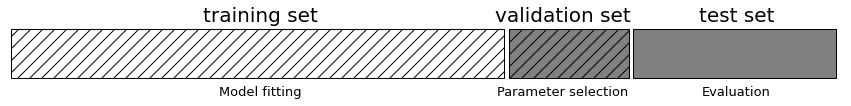

In [26]:
mglearn.plots.plot_threefold_split()

코드로 구현합니다.

In [27]:
from sklearn.svm import SVC

# 데이터를 훈련+검증 세트와 테스트 세트로 나눕니다.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 나눕니다.
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print('훈련 세트의 크기: {}  검증 세트의 크기: {}  테스트 세트의 크기: {}'.
      format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 다시 합쳐서 모델을 생성한 후에
# 테스트 세트를 사용하여 모델을 평가합니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('검증 세트에서 최고 점수: {:.2f}'.format(best_score))
print('최적 매개변수:', best_parameters)
print('최적 매개변수에서 테스트 세트 점수: {:.2f}'.format(test_score))

훈련 세트의 크기: 84  검증 세트의 크기: 28  테스트 세트의 크기: 38
검증 세트에서 최고 점수: 0.96
최적 매개변수: {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수: 0.92


검증 세트에서 최고 점수는 96%입니다. 위에서 출력된 97%보다 낮은 이유는 모델을 훈련할 때 사용한 훈련 세트가 작아졌기 때문입니다.

테스트 세트 점수는 이보다 훨씬 낮은 92%입니다. 새로운 데이터에 대해 92%만 정확하게 분류하는 것입니다.

## **5.2.3 교차 검증을 사용한 그리드 서치**

데이터를 훈련 세트, 검증 세트, 테스트 세트로 나누는 방법은 널리 사용되지만 데이터를 나누는 방법에 매우 민감합니다. 바로 위 코드에서는 C: 10, gamma: 0.001을 최적의 매개변수로 선택했지만, 그 윗절의 코드에서는 C:100, gamma: 0.001을 최적의 매개변수로 선택했습니다.

일반화 성능을 더 잘 평가하려면 훈련 세트와 검증 세트를 한 번만 나누지 않고 교차 검증을 사용해서 각 매개변수 조합의 성능을 평가할 수 있습니다.

위 설명을 코드로 서술합니다.

In [28]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        # `SVC`로 교차 검증을 적용합니다.
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다.
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

5-겹 교차 검증으로 `C`와 `gamma` 설정에 대한 SVM의 정확도를 평가하려면 $36 \times 5=180$개만큼 모델을 생성해야 합니다. 교차 검증의 단점은 이 모델들을 모두 학습시키는 데 걸리는 시간입니다.

최적의 매개변수를 선택하는 방법을 설명한 그래프를 출력합니다.

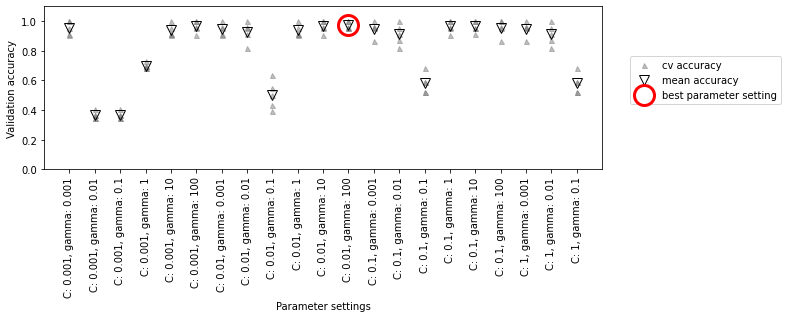

In [29]:
mglearn.plots.plot_cross_val_selection()

매개변수 설정 중에 일부만 나타냈습니다. 각 매개변수 설정(Paramerter settings)마다 교차 검증 분할에 한 개씩 다섯 개의 값을 계산했습니다. 교차 검증 정확도의 평균이 가장 높은 매개변수는 동그라미로 표시됐습니다. 

교차 검증은 데이터셋에 대해 주어진 알고리즘을 평가하는 방법입니다. 하지만 그리드 서치 같은 매개변수 탐색 방법과 합쳐서 주로 사용하므로, 교차 검증이라는 용어는 교차 검증을 사용한 그리드 서치라는 의미로 주로 사용됩니다.

데이터를 나누고 그리드 서치를 적용해서 최종 매개변수를 평가하는 전체 과정을 그림으로 출력합니다.

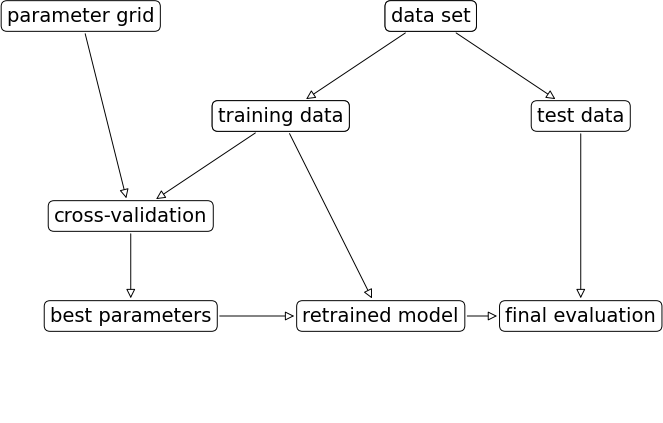

In [30]:
mglearn.plots.plot_grid_search_overview()

`GridSearchCV` 클래스는 교차 검증을 사용한 그리드 서치를 추정기 형태로 구현한 파이썬 클래스입니다. `GridSearchCV` 클래스를 사용하려면 먼저 검색 대상 매개변수를 딕셔너리 형태로 지정해야 합니다. 그러면 `GridSearchCV` 클래스는 이 딕셔너리의 값에 따라 필요한 모든 모델을 학습시킵니다. 딕셔너리의 키는 조정하고자 하는 매개변수 이름(모델 생성 시 지정할 것들이며 이 경우에는 `C`와 `gamma`)이고, 값은 탐색할 매개변수의 설정값입니다. 그리고 모델(`SVC`), 검색 대상 매개변수 그리드('param_grid'), 원하는 k-겹 교차 검증(`cv=5`)으로 `GridSearchCV` 클래스의 객체를 생성합니다.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print('매개변수 그리드:\n', param_grid)

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


`GridSearchCV` 클래스는 교차 검증을 사용합니다. 다만 매개변수의 과대적합을 방지하기 위해 데이터를 훈련 세트와 테스트 세트로 분할해야 합니다.

아울러 'grid_search' 객체는 분류기와 비슷해서 `fit`, `predict`, `score` 매개변수를 제공합니다. `fit` 메서드를 호출하면 'param_grid'에 설정된 매개변수 조합에 대한 교차 검증을 수행합니다.

참고로 다른 추정기를 사용해서 생성한 추정기를 **메타 추정기(meta-estimator**, `MetaEstimatorMixin` 클래스를 상속한 모델)라고 부릅니다. `GridSearchCV`는 가장 널리 사용하는 메타 추정기입니다. 랜덤 포레스트, 그레이디언트 부스팅, RFE 등이 메타 추정기 중 하나입니다. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

`GridSearchCV`가 속한 'grid_search' 객체의 `fit` 메서드는 최적의 매개변수를 찾는 일뿐만 아니라 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터셋에 대해 새로운 모델을 자동으로 생성합니다. 그래서 `fit` 메서드에서 처리하는 일은 이 절의 서두에서 제시한 아래 코드와 같습니다.

In [33]:
# for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
#     for C in [0.001, 0.01, 0.1, 1, 10, 100]:
#         svm = SVC(gamma=gamma, C=C)
#         # `SVC`로 교차 검증을 적용합니다.
#         scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
#         # 교차 검증 정확도의 평균을 계산합니다.
#         score = np.mean(scores)
#         if score > best_score:
#             best_score = score
#             best_parameters = {'C': C, 'gamma': gamma}

# svm = SVC(**best_parameters)
# svm.fit(X_trainval, y_trainval)

`GridSearchCV` 클래스는 전체 데이터로 학습한 모델에 접근할 수 있도록 `predict`와 `score` 메서드를 제공합니다(사용하는 모델에 따라서 `predict_proba`나 `decision_function` 메서드도 사용할 수 있습니다). 찾은 최적의 매개변수로 일반화 성능을 평가하려면 테스트 세트를 매개변수로 넘겨 `score` 메서드를 호출합니다.

In [34]:
print('테스트 세트 점수: {:.2f}'.format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


교차 검증으로 매개변수를 선택해서 정확도가 97%인 모델을 얻었습니다. 중요한 점이라면 매개변수를 선택하는 과정에서 테스트 세트를 사용하지 않고 정확도를 평가하는 데 사용했습니다. 선택한 매개변수는 `best_params_` 속성에 저장되어 있습니다. 매개변수 설정을 통해 각 분할에서 얻은 최상의 교차 검증 (평균)정확도는 `best_score_`에 저장되어 있습니다.

In [35]:
print('최적 매개변수:', grid_search.best_params_)
print('최적 교차 검증 점수:', grid_search.best_score_)

최적 매개변수: {'C': 10, 'gamma': 0.1}
최적 교차 검증 점수: 0.9731225296442687


테스트 세트로 `score` 메서드에서 계산하는 모델의 일반화 성능과 `best_score_` 속성의 값을 혼동하지 않아야 합니다. `score` 메서드나 `predict` 메서드의 결과는 전체 훈련 세트에서 학습한 모델에 대한 것입니다. `best_score_` 속성의 값은 훈련 세트에서 수행한 교차 검증의 평균 정확도입니다.

참고로 훈련 세트가 매개변수 탐색을 위해 5-겹 교차 검증이 적용되었으므로 `best_score_` 속성에는 폴드 4개를 사용해서 학습된 모델의 정확도가 기록되어 있습니다. `GridSearchCV` 클래스를 사용할 때 전달한 훈련 세트는 훈련 세트와 검증 세트를 합친 것입니다. 그리드 서치를 직접 구현할 때는 검증 세트를 나눴지만 `GridSearchCV` 클래스를 사용할 때는 검증 세트가 겉으로 드러나지 않습니다.

가끔은 만들어진 실제 모델에 직접 접근해야 할 경우(계수나 특성 중요도를 살피는 경우)도 있습니다. 최적의 매개변수에서 전체 훈련 세트를 사용하여 학습한 모델은 `best_estimator_` 속성에 저장되어 있습니다. 물론 'grid_search' 객체가 `predict` 메서드와 `score` 메서드를 가지고 있으므로 예측이나 모델 평가를 위해 꼭 `best_estimator_` 속성을 사용할 필요는 없습니다.

In [36]:
print('최고 성능 모델:\n', grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### **교차 검증 결과 분석**

교차 검증 결과를 시각화하면 검색 대상 매개변수가 모델의 일반화에 영향을 얼마나 주는지 이해하기에 수월합니다. 그리드 서치는 연산 비용이 매우 큽니다. 따라서 비교적 간격을 넓게 해서 적은 수의 그리드로 시작하는 것이 좋습니다. 그런 뒤에 교차 검증된 그리드 서치의 결과를 분석해서 검색을 확장해 갈 수 있습니다. 그리드 서치의 결과는 검색과 관련된 여러 정보가 함께 저장되어 있는 딕셔너리인 `cv_results_` 속성에 저장되어 있습니다. 이 속성에는 상세 정보가 많이 들어있습니다. 데이터프레임으로 출력하면 편리합니다.

참고로 `GridSearchCV` 클래스 외에 널리 사용하는 방법인 `RandomizedSearchCV` 클래스가 있습니다. 이 클래스는 주어진 범위에서 매개변수를 무작위로 선택해서 시도합니다. `GridSearchCV` 클래스로 시도한 결과에 비하면 크게 떨어지지 않고 검색 속도가 빠르므로, 매개변수 조합이 많거나 규제 매개변수와 같이 연속형 값을 조정해야 하는 경우에 주로 사용합니다. 기본적인 매개변수 샘플링 횟수는 10개입니다(`n_iter` 매개변수에 지정합니다).

아울러 사이킷런 0.24 버전에서는 **SH(Succesive halving)**방식의 `HalvingGridSearchCV` 클래스가 추가되었습니다. 이 클래스는 모든 파라미터 조합에 대해 제한된 자원으로 그리드 서치를 실행하고, 가장 좋은 후보를 골라서 더 많은 자원을 집중적으로 쓰는 식으로 반복적인 탐색을 수행합니다.

`cv_results_` 속성에 저장된 값을 데이터프레임 형태로 출력합니다.

In [37]:
pd.set_option('display.max_columns', None)
# 속성에 저장된 값을 데이터프레임으로 바꿉니다.
results = pd.DataFrame(grid_search.cv_results_)
# 처음 행 5개를 출력합니다.
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00133643,0.000985718,0.000835419,0.0010118,0.001124
std_fit_time,0.00031537,0.000241779,3.10157e-05,0.000206757,0.000249499
mean_score_time,0.000571871,0.000438356,0.00036459,0.000543594,0.000481224
std_score_time,0.000192214,9.0851e-05,1.41134e-05,0.000175471,0.000119816
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


'results' 객체의 행은 특정한 매개변수를 지정하여 출력된 여러 값입니다. 각 설정에 대해 여러 결괏값(평균, 표준편차 등)이 담겨 있습니다. 교차 검증의 테스트 평균 점수가 같은 매개변수 조합이 있을 경우에는 테스트 점수의 표준편차가 작은 매개변수 조합이 더 좋다고 판단합니다.

위 표에서 나타난 바와 같이 검색 대상 매개변수 그리드는 2차원(`C`와 `gamma`)이므로 히트맵을 사용하여 시각화하면 좋습니다. 먼저 교차 검증의 평균을 뽑아서 `C` 축과 `gamma` 축에 맞도록 배열의 차원을 바꿉니다. 매개변수 탐색 순서는 먼저 `C`가 고정되고 `gamma`가 변하는 식이므로 `mean_test_score`를 $6 \times 6$ 배열로 바꾸면 `C`가 행(y축)에 놓이고 `gamma`가 열(x축)에 놓이는 구조로 변합니다.

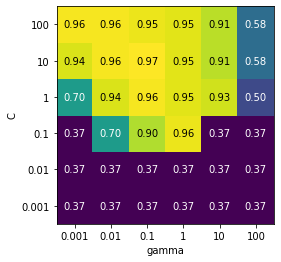

In [38]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# 교차 검증 평균 점수의 히트맵 그래프를 그립니다.
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')
plt.show()

히트맵의 각 포인트는 특정 매개변수 설정에 대한 교차 검증 실행을 나타냅니다. 교차 검증 정확도가 높으면 밝은 색이고 낮으면 어두운 색입니다.

검색 범위가 잘못 지정되면 적절하지 않은 매개변수 그리드의 히트맵이 출력됩니다. 

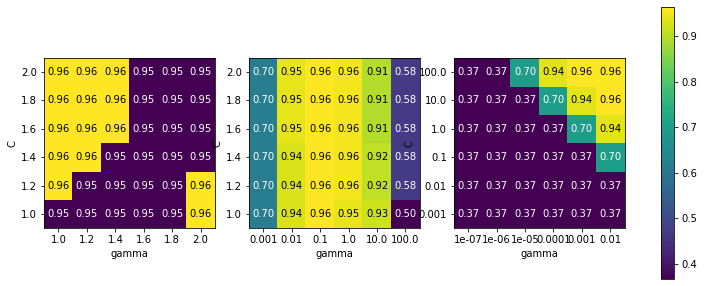

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap='viridis', ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

첫 번째 그래프는 점수가 거의 같습니다. `C`와 `gamma`의 스케일과 범위가 적절하지 않을 때 발생하는 현상입니다. 그러나 매개변수를 바꿔도 정확도가 변하지 않는다면 그 매개변수는 전혀 중요하지 않은 것일지도 모릅니다. 일단 처음에는 극단적인 값을 적용하고 매개변수를 조금씩 바꿔가면서 정확도가 어떻게 변하는지 살피는 것이 좋습니다.

두 번째 그래프는 `gamma` 매개변수만 정확도에 영향을 미칩니다. `C` 매개변수는 적절한 범위를 탐색하지 못하거나 중요한 매개변수가 아닐 가능성이 있습니다.

세 번째 그래프는 두 매개변수에 따라서 점수가 변화합니다. 다만 좌측 부분은 0.37로 변화가 거의 없다시피 합니다. 다음 번 검색 때는 매개변수 그리드에서 매우 작은 단위는 제외될 것입니다. 최적치가 그래프의 경계에 있으므로 이 경계 너머에는 더 좋은 값일 것입니다. 

교차 검증 점수를 토대로 매개변수 그리드를 튜닝하는 것은 매우 안전한 방법입니다. 매개변수들의 중요도를 확인하는 데에도 적합합니다. 다만 최종 테스트 세트를 대상으로 여러 매개변수 범위를 테스트해서는 안 됩니다. 테스트 세트 평가는 사용할 모델이 정확하게 결정되면 딱 한 번만 사용해야 합니다.

### **비대칭 매개변수 그리드 탐색**

경우에 따라서는 모든 매개변수 조합에 대해 `GridSearchCV`를 수행하는 것이 적절하지 않을 수 있습니다. 예를 들면 `SVC`는 `kernel` 매개변수는 사용할 커널 종류에 따라 관련된 매개변수들이 결정됩니다. `kernel='linear'`이면 `C` 매개변수만 사용하고, `kernel='rbf'`이면 `C` 매개변수와 `gamma` 매개변수를 사용합니다. 각 설정마다 사용하는 매개변수가 정해져 있으므로 사용하지 않는 매개변수까지 조사하는 것은 시간과 자원을 낭비하는 일입니다.

조건부 매개변수 조합을 적용하려면 `GridSearchCV` 클래스에 전달할 'param_grid'를 딕셔너리의 리스트로 생성합니다. 리스트에 있는 각 딕셔너리는 독립적인 그리드로 적용됩니다. `kernel`을 포함한 매개변수 그리드의 예를 코드로 서술합니다.

In [40]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print('그리드 목록:\n', param_grid)

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print('최적 파라미터:', grid_search.best_params_)
print('최고 교차 검증 점수: {:.2f}'.format(grid_search.best_score_))

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


`cv_results_` 속성을 다시 살핍니다.

In [41]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00143847,0.000869894,0.00109329,0.00106053,0.000986528,0.00111642,0.00101733,0.00111928,0.000787687,0.000830746,0.000868607,0.000940704,0.000814867,0.000850868,0.000769186,0.00120811,0.000864983,0.000897264,0.000941086,0.00095377,0.00089097,0.000745726,0.00104423,0.00102015,0.00073967,0.000506449,0.000469494,0.000724792,0.00105085,0.00126429,0.000648832,0.000510693,0.000457239,0.0011539,0.00128965,0.00106792,0.000763512,0.000777102,0.000719213,0.000566769,0.00050745,0.00054822
std_fit_time,0.000245822,4.26844e-05,0.000203104,7.99119e-05,8.15852e-05,0.000187904,8.34156e-05,0.00037727,1.81395e-05,2.37753e-05,1.55506e-05,2.46625e-05,1.56141e-05,1.99899e-05,2.97049e-05,0.000819004,4.27178e-05,1.14288e-05,0.000118133,0.000161919,0.000153074,7.60404e-05,4.57424e-05,1.82449e-06,9.99893e-05,1.69612e-05,1.54133e-05,0.000196518,5.33509e-05,0.000113807,1.93037e-05,5.36665e-05,2.74073e-05,0.000823962,0.000401433,1.7216e-05,0.000128963,0.000150874,8.9805e-05,3.86719e-05,1.19129e-05,4.72585e-05
mean_score_time,0.000738859,0.000384998,0.000474453,0.00047555,0.000420332,0.000578356,0.00044446,0.000753498,0.000354958,0.00036478,0.000391436,0.000381422,0.000350332,0.00036993,0.000366735,0.000403547,0.000348663,0.0003582,0.000451088,0.000526142,0.000468636,0.000349426,0.000378799,0.000368595,0.00034709,0.000302792,0.00029788,0.000366831,0.000388861,0.000561428,0.00035553,0.000301981,0.000298691,0.000841236,0.000429773,0.000374174,0.000465679,0.000381756,0.000504446,0.000320625,0.00028162,0.000326443
std_score_time,0.000186557,3.27575e-05,8.24116e-05,2.08534e-05,4.54814e-05,0.000200932,4.00706e-05,0.000673901,5.07199e-06,3.83752e-05,4.82135e-05,1.76973e-05,8.22679e-06,1.47431e-05,1.86372e-05,9.308e-05,1.17496e-05,1.0893e-05,5.85876e-05,0.000138564,0.00011758,2.48846e-05,3.13933e-05,1.47796e-05,1.97502e-05,1.0705e-05,2.60222e-05,0.000123547,3.31431e-05,9.00318e-05,1.05417e-05,2.85261e-05,1.92771e-05,0.000578316,9.05887e-05,1.47609e-05,0.000207643,0.000112486,0.000158056,2.52343e-05,1.26226e-05,7.50237e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1

### **그리드 서치에 다양한 교차 검증 적용**

`cross_val_score`와 비슷하게 `GridSearchCV` 클래스는 분류에는 계층형 k-겹 교차 검증을, 회귀에는 기본 k-겹 교차 검증을 사용합니다. 그러나 `cv` 매개변수에 교차 검증 분할기를 지정할 수도 있습니다. 훈련 세트와 테스트 세트로 한 번만 분할하려면 `n_splits=1`로 하고 `SuffleSplit`나 `StratifiedShuffleSplit`를 사용합니다. 데이터셋이 매우 크거나 모델 구축에 오랜 시간이 소요될 때 유용한 방법입니다.

### **중첩 교차 검증**

`GridSearchCV` 클래스를 사용할 때 데이터를 훈련 세트와 테스트 세트로 한 번만 나누기 때문에 결과가 불안정하고 테스트 데이터의 분할에 크게 의존합니다. 이 방식 대신 교차 검증 분할 방식을 택할 수 있습니다. 이를 **중첩 교차 검증(nested cross-validataion)**이라고 부릅니다. 

중첩 교차 검증에서는 바깥쪽 루프에서 데이터를 훈련 세트와 테스트 세트로 나눕니다. 그리고 각 훈련 세트에 대해 그리드 서치를 실행합니다(바깥쪽 루프에서 분할된 훈련 세트마다 최적의 매개변수가 다를 것입니다). 그리고나서 바깥쪽에서 분할된 테스트 세트의 점수를 최적의 매개변수 설정을 사용해서 각각 측정합니다.

중첩 교차 검증은 모델이나 매개변수 설정이 아닌, 테스트 점수의 목록을 만듭니다. 이 점수 목록을 통해 그리드 서치로 찾은 최적의 매개변수가 얼마나 모델을 잘 일반화시키는지 알 수 있습니다. 다만 새로운 데이터에 적용할 모델을 생성하는 것이 아니므로 미래의 데이터에 적용하기 위한 예측 모델을 찾는 데는 거의 사용하지 않습니다.

중첩 교차 검증을 사용하려면 `GridSearchCV` 클래스의 객체를 모델로 삼아서 `cross_val_score` 함수를 호출합니다. 

In [42]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print('교차 검증 점수:', scores)
print('교차 검증 평균 점수:', scores.mean())

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수: 0.9800000000000001


`SVC`는 iris 데이터셋에서 평균 교차 검증 정확도가 98%입니다. 여기에서 안쪽 루프와 바깥쪽 루프에 각각 같은 교차 검증 분할기인 계층형 5-겹 교차 검증(`StratifiedKFold`)을 사용했습니다(`cross_val_score`가 바깥쪽 루프, `GridSearchCV`가 안쪽 루프입니다). 'param_grid' 객체의 매개변수 조합은 36개입니다(생성되는 모델은 $36 \times 5 \times 5 = 900$개입니다). 많은 자원은 소모하는 방법입니다. 물론 각각 다른 교차 검증 전략을 조합할 수도 있습니다. 

for문을 사용해서 중첩 교차 검증을 구현하는 함수를 생성합니다.

In [43]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # 'outer_cv' 객체의 분할을 순회하는 for문을 만듭니다.
    # `split` 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 반환합니다.
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수를 탐색합니다.
        best_parms = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            # 안쪽 교차 검증의 점수를 기록합니다.
            cv_scores = []
            # 'inner_cv' 객체의 분할을 순회하는 for문을 만듭니다.
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듭니다.
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가합니다.
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수를 계산합니다.
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해서 분류기를 만듭니다.
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트를 사용해서 평가합니다.
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

이 함수를 iris 데이터셋에 적용합니다.

In [44]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('교차 검증 점수:', scores)

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]


### **교차 검증과 그리드 서치 병렬화**

그리드 서치는 데이터 용량이 크고 매개변수 수도 많을 때는 상당한 연산 부하를 일으키지만 쉽게 병렬화할 수 있습니다. 하나의 교차 검증 분할에서 특정 매개변수 설정을 사용해서 모델을만드는 일은 다른 매개변수 설정이나 모델과 전혀 상관없이 진행할 수 있기 때문입니다. 그러므로 그리드 서치와 교차 검증은 여러 CPU 코어 또는 클러스터에 병렬화하기 좋습니다. 모델과 `GridSearchCV`와 `cross_val_score`에서 `n_jobs` 매개변수에 사용할 CPU 코어 수를 지정할 수 있습니다. `n_jobs=-1`이면 가능한 모든 코어를 사용합니다. 이는 중첩 교차 검증에도 해당됩니다. 분산 컴퓨팅 패키지인 [Desk](https://ml.dask.org/joblib.html)을 사용하면 클러스터의 여러 머신에서 그리드 서치와 교차 검증을 병렬화할 수도 있습니다.

# **5.3 평가 지표와 측정**

지금까지 우리는 분류 문제에 대한 성능 평가에는 정확도(정확하게 분류된 샘플의 비율)를, 회귀 문제에 대한 성능 평가에는 $R^2$을 사용했습니다. 이외에도 지도 학습 모델의 성능을 재는 여러 방법이 있습니다. 실전에서는 애플리케이션에 따라 이런 평가 지표가 적합하지 않을 수 있기 때문에 모델을 선택하고 매개변수를 튜닝할 때 올바른 지표를 선택하는 일이 중요합니다.

## **5.3.1 최종 목표를 기억하라**

평가 지표를 선택할 때 머신러닝 애플리케이션의 최종 목표는 중요합니다. 실제로 정확한 예측을 만드는 것뿐만 아니라 의사 결정 프로세스의 일부로 활용하는 측면에 중점을 둬야 할수도 있습니다. 머신러닝 평가 지표를 선택하기 전에 비즈니스 지표라는 애플리케이션의 고차원적인 목표를 고려해야 합니다.

머신러닝 애플리케이션에서 특정 알고리즘을 선택해서 나타난 결과를 **비즈니스 임팩트(business impact)**라고 부릅니다. 고차원적인 목표는 교통사고를 피하거나 입원 환자 수를 줄이는 것일 수 있습니다. 웹사이트에 더 많은 사용자를 유입시키거나 쇼핑몰에서 사용자의 소비를 늘리는 것일 수 있습니다. 모델을 선택하고 매개변수를 조정할 때 이런 비즈니스 지표에 긍정적인 영향을 주는 모델과 매개변수를 선택해야 합니다. 많은 경우에 특정 모델이 비즈니스에 미치는 영향은 실제 운영 시스템에 적용해야만 알 수 있습니다.

개발 초기 단계에서 매개변수를 조정하기 위해 시험 삼아 모델을 운영 시스템에 곧바로 적용하기란 위험부담이 크고 현실적이지 않습니다. 자율 주행차의 보행자 회피 기능의 경우라면 검증을 거치지 않고 실전에 투입할 수 없습니다. 검증을 위해 계산하기 쉬운 평가 지표를 활용한 대리 평가 방식을 사용해야 합니다. 예컨대 보행자 여부를 나타내는 이미지를 분류하는 테스트를 통해 정확도를 측정합니다. 물론 이는 대체 방식(근사 지표)이므로 어느 정도는 평가가 가능합니다만, 본래 비즈니스 목적에 가장 가까운 지표를 찾아내야 합니다.

대체 방식(근사 지표)는 모델을 평가하고 선택할 때마다 사용해야 합니다. 평가 결과는 숫자 하나가 아닐 수 있습니다. 다만 선택한 모델에 대한 예상 비즈니스 임팩트를 나타내야 합니다. 예를 들면 어떤 알고리즘을 적용했을 때 고객 수가 10%만큼 늘었지만 고객당 매출은 15% 줄어들 수 있습니다.

## **5.3.2 이진 분류의 평가 지표**

이진 분류(양성 클래스와 음성 클래스 중에 양성 클래스가 주 관심 클래스)는 실전에서 가장 많이 사용하는 쉬운 머신러닝 알고리즘입니다. 하지만 아무리 간단한 작업이라도 주의할 사항은 많습니다. 여러 평가 지표를 들여다보기 전에 정확도를 잘못 측정하는 경우를 살펴봅니다.

### **에러의 종류**

잘못 분류한 샘플의 수가 원하는 정보의 전부는 아닙니다. 정확도만으로 예측 성능을 측정하기엔 부족할 때가 많습니다. 분류 오류로 인한 여러 결과를 고려해야 합니다. 에컨대 자동화 테스트로 암을 조기 발견하는 애플리케이션의 경우, 테스트가 양성이면 암일 가능성이 있으므로 추가 검사를 요할 수 있습니다. 그러나 실제로 양성이지만 음성으로 예측한다면 이로 인한 치명적인 결과를 부를 수 있습니다. 어떤 모델이든 완벽하지 않으므로 항상 정확한 예측을 하지는 못합니다.

잘못된 양성 예측을 **거짓 양성(false positive, 타입 I 에러)**라고 부르고, 잘못된 음성 예측을 **거짓 음성(false negative, 타입 II 에러)**라고 합니다.

### **불균형 데이터셋**

거짓 양성과 거짓 음성은 두 클래스 중에 하나가 다른 것보다 훨씬 많을 경우에 더 중요합니다. 실제로 이는 매우 흔한 상황입니다. 예컨대 아이템(광고, 관련 기사, SNS에서 팔로우 하도록 추천하는 사람 등)이 사용자에게 보여진 노출 데이터로 사용자의 클릭을 예측하는 것입니다. 목표는 사용자가 클릭을 할지 예측하는 것입니다. 인터넷에서 사용자에게 노출된 정보(광고 등) 대부분은 클릭되지 않습니다. 사용자가 관심이 있는 것을 클릭할 때까지 수많은(100개로 예시합니다) 광고나 글을 보여줘야 할지도 모릅니다. 이때 데이터 99개와 클릭 데이터 1개로 데이터셋이 형성됩니다. 다시 말하면 샘플 99%가 '노클릭' 클래스입니다. 현실에서는 불균형 데이터가 훨씬 많습니다. 이렇게 한 클래스가 다른 것보다 훨씬 많은 데이터셋을 **불균형 데이터셋(imbalanced datasets)** 또는 불균형 클래스의 데이터셋으로 부릅니다. 

클릭을 99% 정확도로 예측하는 분류기를 생성했다고 가정하겠습니다. 기실 99% 정확도는 불균형 클래스를 고려하지는 못했습니다. 머신러닝 모델을 생성하지 않고도 무조건 '노클릭'으로 예측한다면 정확도는 99%입니다. 하지만 불균형 데이터에서도 99% 정확도는 매우 좋은 성능일 수 있습니다. 따라서 정확도로는 '노클릭' 모델과 '좋은 모델'을 구분하기 어렵습니다. 

위 설명은 이해하기에 다소 난해할 수 있습니다. 설명을 추가하고자 digits 데이터셋을 사용해서 숫자 9를 다른 숫자와 구분하고, 9:1의 비율을 가진 불균형한 데이터셋을 생성합니다.

In [45]:
from sklearn.datasets import load_digits

digits = load_digits()
# y를 `digits.target`의 값이 0~8일 경우엔 False,
# 9일 경우엔 True로 만들어서 이진 분류 문제로 바꿉니다.
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

항상 다수인 클래스(9가 아님)를 예측값으로 내놓는 `DummyClassifier`를 사용해서 정확도를 계산합니다.

참고로 `DummyClassifier` 클래스는 실제 모델과 비교하기 위해 간단한 규칙을 지원하는 모델입니다. `strategy` 매개변수로 지정할 수 있는 규칙은 레이블 비율에 맞게 예측하는 `'stratified'`, 가장 많은 레이블을 예측하는 `'most_frequent'` 등이 있습니다. 

`DummyRegressor`는 회귀 버전입니다. 지원하는 규칙은 평균값을 예측하는 `'mean'`(기본값), 중간값을 예측하는 `'median'` 등이 있습니다.

In [46]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('예측된 레이블의 레이블:', np.unique(pred_most_frequent))
print('테스트 점수: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 레이블: [False]
테스트 점수: 0.90


학습하지 않고도 정확도 90%를 얻었습니다. 문제에 따라서는 무조건 한 클래스를 예측하기만 해도 되는 수준입니다.

실제 분류기를 사용한 것과 비교합니다.

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('테스트 점수: {:.2f}'.format(tree.score(X_test, y_test)))

테스트 점수: 0.92


위에서 생성한 더미 분류기보다 약간 더 나은 수준입니다. `DecisionTreeClassifier`를 잘못 사용했거나, 이 문제에서 정확도가 높은 측정 방법이 아니라는 점을 의미합니다.


비교를 위해 `LogisticRegression` 클래스와 `DummyClassifier` 클래스를 더 살핍니다. `DummyClassifier` 클래스는 무작위로 선택하므로 훈련 세트와 같은 비율을 가진 예측값을 만듭니다. `DummyClassifier` 클래스의 `strategy` 매개변수의 기본값은 `stratified`입니다. 클래스 레이블의 비율과 같은 비율로 예측 결과를 만듭니다. 다만 타깃값인 'y_test'와는 다르므로 정확도는 더 낮아집니다. 

In [48]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수: {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수: {:.2f}'.format(logreg.score(X_test, y_test)))

dummy 점수: 0.82
logreg 점수: 0.98


위 코드를 통해 생성한 모델이 실제로 유용한지는 판단하기 어렵습니다. 예측 성능을 정량화하는 데 불균형 데이터셋에서는 정확도가 적절한 측정 방법이 아닙니다. 

아래 파트부터는 모델을 선택할 때 도움을 주는 다른 평가 지표를 살핍니다. 모델을 평가하는 지표라면 위처럼 상식적이지 않은 예측은 피해야 합니다. 특히 빈도 예측인 'pred_most_frequent'와 무작위 기반 예측인 'pred_dummy'보다 얼마큼 더 성능이 나은지 알려주는 평가 지표가 필요합니다.

### **오차 행렬**

**오차 행렬(confusion matrix)**은 이진 분류 평가 결과를 나타낼 때 널리 사용하는 방법입니다.

앞 절의 `LogisticRegression` 클래스의 예측 결과를 `confusion_matrix` 함수로 설명합니다.

In [49]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬:\n', confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


$2 \times 2$ 배열이 출력됐습니다. 행은 정답 클래스, 열은 예측 클래스입니다. 각 항목의 숫자는 행에 해당하는 클래스(9가 아님(true 'not nine'), 9(true 'nine')가 얼마나 많이 열에 해당하는 클래스로 분류되었는지 나타냅니다.

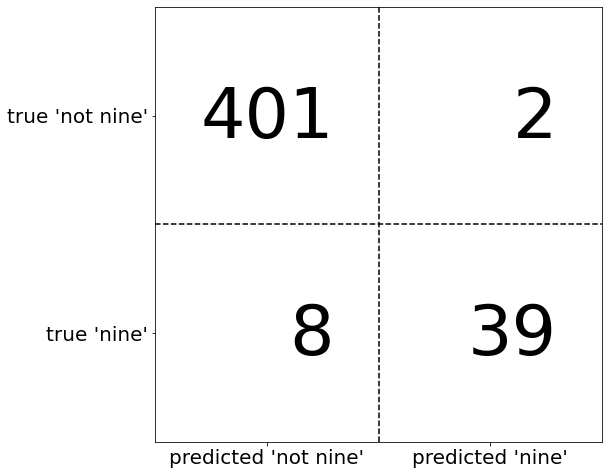

In [50]:
mglearn.plots.plot_confusion_matrix_illustration()

오차 행렬의 대각 행렬은 정확히 분류된 경우입니다. 나머지 항목은 잘못 분류된 경우입니다.

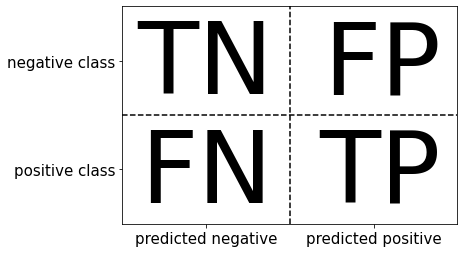

In [51]:
mglearn.plots.plot_binary_confusion_matrix()

두 그림을 토대로 설명합니다. 숫자 9를 양성 클래스로 정의하면 오차 행렬의 항목을 거짓 양성과 거짓 음성으로 연결할 수 있습니다. 전체 그림을 완성하기 위해 양성 클래스로 올바르게 분류한 샘플을 **진짜 양성(TP, true positive)**이라고 부르고, 음성 클래스로 정확하게 분류한 샘플을 **진짜 음성(TN, true negative)**으로 부릅니다. 

위의 오차 행렬을 사용해서 모델들을 비교합니다.

In [52]:
print('빈도 기반 더미 모델:')
print(confusion_matrix(y_test, pred_most_frequent))
print()
print('무작위 더미 모델:')
print(confusion_matrix(y_test, pred_dummy))
print()
print('결정 트리:')
print(confusion_matrix(y_test, pred_tree))
print()
print('로지스틱 회귀:')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[369  34]
 [ 41   6]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀:
[[402   1]
 [  6  41]]


빈도 기반 더미 모델은 크게 잘못됐습니다. 항상 음성 클래스만 예측합니다. 

무작위 더미 모델은 거짓 음성(42)과 거짓 양성(45)이 진짜 양성(5)보다 상당히 많습니다.

결정 트리는 더미 분류기들보다 정상으로 보이지만 정확도는 비슷합니다.

로지스틱 회귀는 모든 면에서 결정 트리보다 낫습니다. 진짜 양성과 진짜 거짓이 더 많고 거짓 양성과 거짓 음성은 적습니다.

결론적으로 결정 트리와 로지스틱 회귀만 정상이고, 로지스틱 회귀가 트리 모델보다 전적으로 잘 작동했습니다. 오차 행렬의 모든 면에는 많은 정보가 있습니다. 그러나 전체 오차 행렬을 조사하는 일은 번거롭고 매우 수동적이며 정성적인 방법입니다. 오차 행렬 정보를 요약하여 살피는 방법이 필요합니다. 아래 파트에서 설명합니다.

#### **정확도와의 관계**

오차 행렬의 결과는 정확도로 표현하여 요약할 수 있습니다.

정확도 = $\frac{TP+TN}{TP+TN+FP+FN}$

정확도는 정확하게 예측한 수인 진짜 양성(TP)과 진짜 음성(TN)을 전체 샘플 수로 나눠서 구합니다.

#### **정밀도, 재현율, f-점수**

오차 행렬의 결과를 요약하는 여러 방법 중에 가장 일반적인 것은 **정밀도(precision)**와 **재현율(recall)**입니다.

**정밀도(=양성 예측도(PPV))**는 양성으로 예측된 것(TP + FP) 중에 얼마나 많은 샘플이 진짜 양성(TP)인지 측정합니다. 정밀도를 구하는 공식은 아래와 같습니다.

정밀도 = $\frac{진짜 양성}{진짜 양성+진짜 음성}$ = $\frac{TP}{TP+FP}$

정밀도는 거짓 양성(FP)의 수를 줄이는 것을 목표로 할 때 성능 지표로 사용합니다. 예컨대 임상 실험을 통해 신약의 치료 효과를 예측하는 모델이 있다고 가정하겠습니다. 임상 실험의 비용은 매우 비싸므로 단 한 번의 실험을 통해 신약의 효과를 검증하고자 합니다. 하여 모델이 거짓 양성(FP)을 많이 만들지 않도록 하는 것이 중요합니다. 높은 정밀도가 필요한 것입니다.

**재현율(=민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR))**은 전체 양성 샘플 중에 얼마나 많은 샘플이 양성 클래스로 분류되는지 측정한 지표입니다. 재현율을 구하는 공식은 아래와 같습니다.

재현율 = $\frac{진짜 양성}{진짜 양성+거짓 음성}$ = $\frac{TP}{TP+FN}$

모든 양성 샘플을 식별해야 할 때 성능 지표로 사용합니다. 거짓 음성(FN)을 피하는 것이 중요하다는 점을 의미합니다. 위에서 예시했던 암 진단 사례에 해당하는 적합한 지표입니다. 건강한 사람(거짓 음성)이 일부 포함되더라도 암에 걸린 사람(진짜 양성)을 한 명도 빠짐없이 찾아내는 것이 중요할 것입니다.

정밀도 최적화와 재현율 최적화는 상충합니다. 모든 샘플을 진짜 음성(TN)이 하나도 없고 모두 양성 클래스에 속한다고 예측하면 거짓 음성(FN)이 없어지게 되어 재현율은 완벽해집니다. 그러나 모든 샘플을 양성으로 예측하면 거짓 양성(FP)을 많이 만들게 되어 정밀도는 매우 낮아집니다(모든 데이터를 양성으로 예측하면 진짜 음성(TN)이 거짓 양성(FP)이 되어 정밀도의 분모를 크게 만듭니다. 하지만 거짓으로 예측한 것이 없으므로 거짓 음성(FN)이 0이 되어 재현율은 0이 됩니다). 다른 한편으로 샘플 하나만 양성이고 나머지는 음성으로 예측한다면 정밀도는 완벽하지만 재현율은 매우 낮아질 것입니다. 양성 포인트 하나만 예측하면 진짜 양성(TP)은 1이고 거짓 양성(FP)은 0이므로 정밀도는 1입니다. 하지만 나머지 모두를 음성이라고 예측하면 진짜 음성(TN)을 제외하고 모두 거짓 음성(FN)이므로 재현율의 분모가 커집니다.

**NOTE**

정밀도와 재현율 외에도 TP, FP, TN, FN으로 만들 수 있는 [여러 분류 측정](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) 방법이 있습니다. 분야마다 다른 지표를 사용할 수 있습니다. 물론 머신러닝에서는 이진 분류 문제에 정밀도와 재현율을 가장 많이 사용합니다.

NOTE 위의 설명을 이어갑니다. 정밀도와 재현율은 상충 관계이므로 이 중에 하나만으로 전체 그림을 볼 수는 없습니다. 이 두 지표를 하나로 요약하는 방법은 정밀도와 재현율의 조화 평균인 $f$-점수($f$-score) 또는 $f$-측정($f$-measure)입니다. 아래는 이 방법의 공식입니다.

$F = 2 \times \frac{정밀도 \cdot 재현율}{정밀도 + 재현율}$

특별히 이 공식을 $f_1-$점수라고도 합니다. 정밀도와 재현율을 같이 고려하므로 불균형한 이진 분류 데이터셋에서는 정확도보다 더 나은 지표가 될 수 있습니다.

참고로 $f-$점수의 일반화된 가중치 조화 평균 공식은 정밀도를 P, 재현율을 R이라고 할 때, $F=\frac{1}{\alpha \frac{1}{P}+(1-\alpha) \frac{1}{R}}=\frac{(\beta^1+1)PR}{\beta^2P+R}$, $\beta^2=\frac{1-\alpha}{\alpha}$입니다.

$f_1$은 $\beta=1$일 때, 즉 정밀도와 재현율의 가중치가 동일한 $\alpha=0.5$일 때 점수를 의미합니다. $\beta$가 1보다 크면 재현율이 강조되고 1보다 작으면 정밀도가 강조됩니다. 보통 $f-$점수라 하면 $f_1-$점수를 말합니다.

앞서 계산한 '9와 9가 아님' 데이터셋의 예측에 적용하겠습니다. 여기서 숫자 '9'가 양성 클래스('9'는 True, 나머지는 False 레이블)이므로 양성 클래스인 '9'가 소수(minority) 클래스입니다.

In [54]:
from sklearn.metrics import f1_score

print('빈도 기반 더미 모델의 f1 score: {:.2f}'.format(
    f1_score(y_test, pred_most_frequent)))
print('무작위 더미 모델의 f1 score: {:.2f}'.format(
    f1_score(y_test, pred_dummy)))
print('트리 모델의 f1 score: {:.2f}'.format(
    f1_score(y_test, pred_tree)))
print('로지스틱 회귀 모델의 f1 score: {:.2f}'.format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.14
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


하나는 양성 클래스로 예측된 것이 하나도 없어서 빈도 더미 모델이 0으로 출력됐습니다. $f_1-$ 점수의 분모가 0이 된 것입니다. 아울러 무작위 더미 분류기와 트리 분류기 사이에도 정확도에 없었던 뚜렷한 차이가 나타납니다.

이렇듯 $f_1-$ 점수를 활용하면 예측 성능이 하나의 숫자로 요약됩니다. 어떤 모델이 좋은지 직관적으로 판단하는 경우에는 정확도보다 $f_1-$ 점수가 좋습니다. 다만 $f_1-$ 점수는 정확도보다 이해하거나 설명하기 어렵습니다.

`classification_report` 함수는 정밀도, 재현율, $f_1-$ 점수를 한 번에 계산해서 출력합니다.

In [57]:
from sklearn.metrics import classification_report

# 양성 클래스가 '9'입니다.
print(classification_report(y_test, pred_most_frequent,
                            target_names=['9가 아님', '9']))

              precision    recall  f1-score   support

       9가 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


모든 샘플을 '9가 아님'으로 분류했으므로 '9가 아님' 클래스의 재현율(recall)은 1입니다. 지지도(support)는 샘플 수를 의미합니다.

마지막 세 줄은 정밀도, 재현율, $f_1-$ 점수의 평균을 나타냅니다. 'macro avg'는 클래스별 점수의 평균을 계산한 것입니다. 'weighted avg'는 클래스의 샘플 수로 가중 평균을 한 것입니다. 정밀도나 재현율 점수만 보는 것보다 두 클래스를 평균한 값을 보는 것이 더 의미있습니다.

무작위 더미 분류기와 로지스틱 회귀의 리포트를 비교합니다.

In [61]:
print(classification_report(y_test, pred_dummy, target_names=['9가 아님', '9']))

              precision    recall  f1-score   support

       9가 아님       0.90      0.92      0.91       403
           9       0.15      0.13      0.14        47

    accuracy                           0.83       450
   macro avg       0.53      0.52      0.52       450
weighted avg       0.82      0.83      0.83       450



In [62]:
print(classification_report(y_test, pred_logreg, target_names=['9가 아님', '9']))

              precision    recall  f1-score   support

       9가 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



두 모델의 지표는 큰 차이가 없습니다. 어떤 클래스를 양성 클래스로 선택하느냐가 이 평가 지표에 큰 영향을 미칩니다. 무작위 더미 모델에서 '9' 클래스의 $f_1-$ 점수는 0.12, 로지스틱 회귀 모델에서는 0.92입니다. 그러나 '9가 아님' 클래스는 각각 0.91과 0.99이므로 모두 괜찮은 수치입니다. 주목할 점은 로지스틱 회귀 모델은 모든 숫자를 함께 보면 더 정확한 판단을 내릴 수 있으므로 무작위 더미 모델보다 더 우수하다고 판단할 수 있습니다.

### **불확실성 고려**

오차 행렬과 분류 리포트가 예측 결과를 자세히 분석하도록 도와줍니다. 다만 예측값은 모델에 담긴 많은 정보가 이미 손실된 상태입니다. 대부분의 분류기는 예측의 확신을 가늠하는 `decision_function` 메서드 또는 `predict_proba` 메서드를 가집니다. 예측을 만드는 것은 두 메서드 출력의 임계값을 검증하는 것입니다. 이진 탐색에서 임계값으로 `decision_function` 메서드는 0, `predict_proba` 메서드는 0.5를 사용합니다.

아래 예시는 음성 클래스 샘플 400개, 양성 클래스 샘플 50개로 구성된 불균형한 이진 분류 문제입니다. 이 데이터셋에 커널 SVM을 학습시킵니다. 그래프를 출력해서 설명합니다.

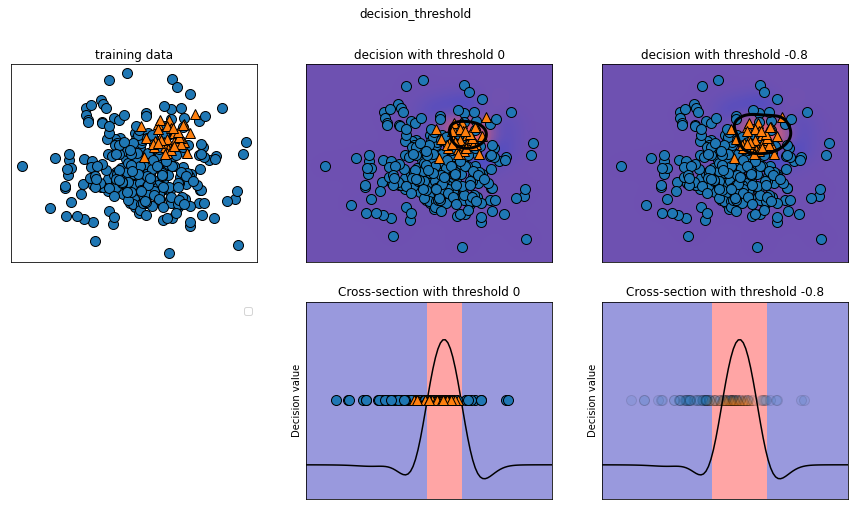

In [64]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

훈련 데이터는 첫 번째 그림입니다. 훈련 데이터 그래프 오른쪽에 결정 함수 값을 히트맵으로 나타냈습니다. `decision_function`이 정확하게 0일 경우의 임계점을 중앙 윗부분에 위치한 검은 원으로 나타냈습니다. 이 원 안의 샘플은 양성 클래스로 분류되고, 바깥쪽 샘플은 음성 클래스로 분류됩니다.

`classification_report` 함수를 사용해서 두 클래스의 정밀도와 재현율을 평가합니다.

In [65]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



클래스 1에 대해 매우 작은 정밀도를 얻었습니다. 재현율은 절반 정도입니다. 클래스 0의 샘플이 매우 많으므로 분류기는 소수인 클래스 1보다 클래스 0에 초점을 맞추고 있습니다.

이 애플리케이션이 앞의 암 진단 예와 같이 클래스 1의 재현율을 높이는 게 중요하다고 가정하겠습니다. 이는 클래스 1로 잘못 분류된 거짓 양성(FP)이 늘더라도 재현율을 높이기 위해 진짜 양성(TP)을 늘려야 하는 것을 의미합니다. `svc.predict`로 만든 예측은 이 조건을 충족하지는 못하지만 임계값을 바꿔서 클래스 1의 재현율을 높이도록 예측을 조정할 수 있습니다. 기본적으로 `decision_function`의 값이 0보다 큰 샘플은 클래스 1로 분류됩니다. 더 많은 샘플이 클래스 1로 분류되려면 임계값을 낮춰야 합니다.

In [67]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



클래스 1의 재현율이 높아지고 정밀도는 낮아졌습니다. 더 넓은 영역이 클래스 1로 분류되는 것입니다. 재현율보다 정밀도가 중요하거나 그 반대, 또는 데이터가 심하게 불균형일 경우에 결정 함수의 임계값을 바꾸면 더 나은 결과를 얻을 수 있습니다. `decision_function`은 임의의 범위를 갖고 있으므로 임계점을 고르는 일반적인 방법을 제시하기는 어렵습니다. 임계값을 선택할 때 테스트 세트를 사용하지 않도록 주의를 기울여야 합니다. 다른 하이퍼파라미터와 마찬가지로 임계값 설정에 테스트 세트를 사용하면 과도하게 낙관적인 결과를 만들 가능성이 높습니다. 대신 검증 세트나 교차 검증을 사용해야 합니다.

**CAUTION**

이 예시에서는 테스트 세트의 결과를 바탕으로 임계값을 선택했지만, 실전에서는  테스트 세트를 사용해서는 안 됩니다. 다른 매개변수들처럼 테스트 세트에서 결정 임계값을 선택하면 과도하게 낙관적인 결과가 나옵니다. 대신 검증 세트나 교차 검증을 사용해야 합니다.

`predict_proba` 메서드는 출력이 0에서 1 사이로 고정되므로 이 메서드를 제공하는 모델은 임계값을 선택하기에 더 쉽습니다. 기본값(0.5)을 임계값으로 설정한 모델은 양성 클래스라는 확신이 50% 이상일 때 양성으로 분류합니다. 임계값을 높이면 양성 클래스로 분류할 때 더 큰 확신이 있어야 합니다. 음성 클래스는 확신이 덜 필요합니다. 임의의 임계값보다는 확률을 사용하는 쪽이 더 직관적이지만, 모든 모델이 쓸모가 있는 불확실성을 제공하는 것은 아닙니다. 예컨대 최대 깊이까지 자란 `DecisionTree`는 비록 잘못된 것이라도 항상 100% 확신합니다. 이는 **보정(calibration)** 개념과 관련이 있습니다. 보정된 모델은 불확실성을 정확하게 측정하는 모델입니다.

### **정밀도-재현율 곡선과 ROC 곡선**

### **ROC와 AUC**

## **5.3.3 다중 분류의 평가 지표**

## **5.3.4 회귀의 평가 지표**

## **5.3.5 모델 선택에서 평가 지표 사용하기**

# **5.4 요약 및 정리**